In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from eda.kpis import avg_fare_per_airline, seasonal_fare_variation, top_expensive_routes,most_popular_route
from eda.visualization import plot_fare_distributions, correlation_heatmap, boxplot_fare_by_airline, plot_avg_fare_over_time, plot_actual_vs_predicted,plot_residuals,plot_regularization_effect
from eda.descriptive_stat import summarize_fares, numerical_correlation
from insights import generate_text_insights,feature_importance_analysis
from feature_importance import extract_linear_coefficients,plot_tree_feature_importance
from sklearn.model_selection import train_test_split
from model.model_utilis import train_model
from model.multi_models import train_and_compare_regressors,demonstrate_regularization_effect

from sklearn.linear_model import LinearRegression

In [31]:
df = pd.read_csv("C:/Users/RichardAnaneSarfo/Desktop/ML/Dataset/Flight_Price_Dataset_of_Bangladesh.csv")
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

In [33]:
df.describe()

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,3.994955,58899.556573,11448.238494,71030.316199,45.460579
std,4.094043,68840.614499,12124.344329,81769.199536,26.015657
min,0.500000,1600.975688,200.000000,1800.975688,1.000000
25%,1.003745,8856.316983,200.000000,9602.699787,23.000000
50%,2.644656,31615.996792,9450.940481,41307.544990,45.000000
75%,5.490104,85722.930389,17513.046160,103800.906963,68.000000
max,15.831719,449222.933770,73383.440066,558987.332444,90.000000


In [34]:
df.isnull().sum()

Airline                  0
Source                   0
Source Name              0
Destination              0
Destination Name         0
Departure Date & Time    0
Arrival Date & Time      0
Duration (hrs)           0
Stopovers                0
Aircraft Type            0
Class                    0
Booking Source           0
Base Fare (BDT)          0
Tax & Surcharge (BDT)    0
Total Fare (BDT)         0
Seasonality              0
Days Before Departure    0
dtype: int64

DATA CLEANING & PREPROCESSING

In [35]:
df.loc[df.duplicated()]

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure


In [36]:
df[['Total Fare (BDT)', 'Base Fare (BDT)']].min()

Total Fare (BDT)    1800.975688
Base Fare (BDT)     1600.975688
dtype: float64

In [37]:
df['Departure Date & Time'] = pd.to_datetime(df['Departure Date & Time'])
df['Arrival Date & Time'] = pd.to_datetime(df['Arrival Date & Time'])


In [38]:
df['Departure_date'] = df['Departure Date & Time'].dt.date
df['Departure_time'] = df['Departure Date & Time'].dt.time

df['Arrival_date'] = df['Arrival Date & Time'].dt.date
df['Arrival_time'] = df['Arrival Date & Time'].dt.time


In [39]:
df = df.drop(
    ['Source Name', 'Destination Name', 'Departure Date & Time', 'Arrival Date & Time'],
    axis=1
)

In [40]:
df[['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)']] = \
df[['Duration (hrs)', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)']].round(2)
df.head()

,Airline,Source,Destination,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Departure_date,Departure_time,Arrival_date,Arrival_time
0,Malaysian Airlines,CXB,CCU,1.22,Direct,Airbus A320,Economy,Online Website,21131.23,5169.68,26300.91,Regular,10,2025-11-17,06:25:00,2025-11-17,07:38:10
1,Cathay Pacific,BZL,CGP,0.61,Direct,Airbus A320,First Class,Travel Agency,11605.40,200.00,11805.40,Regular,14,2025-03-16,00:17:00,2025-03-16,00:53:31
2,British Airways,ZYL,KUL,2.69,1 Stop,Boeing 787,Economy,Travel Agency,39882.50,11982.37,51864.87,Winter Holidays,83,2025-12-13,12:03:00,2025-12-13,14:44:22
3,Singapore Airlines,RJH,DAC,0.69,Direct,Airbus A320,Economy,Direct Booking,4435.61,200.00,4635.61,Regular,56,2025-05-30,03:21:00,2025-05-30,04:02:09
4,British Airways,SPD,YYZ,14.06,1 Stop,Airbus A350,Business,Direct Booking,59243.81,14886.57,74130.38,Regular,90,2025-04-25,09:14:00,2025-04-25,23:17:20


EXPLORATORY DATA ANALYSIS (EDA)

    Visuals

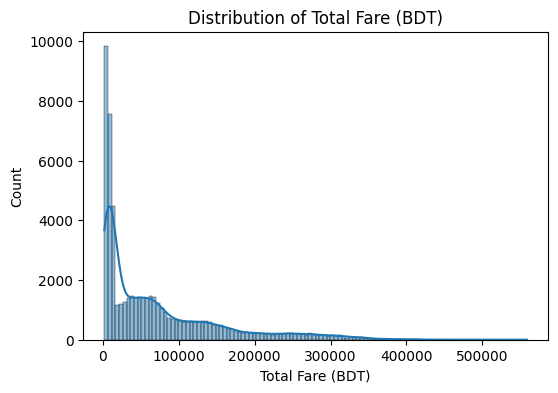

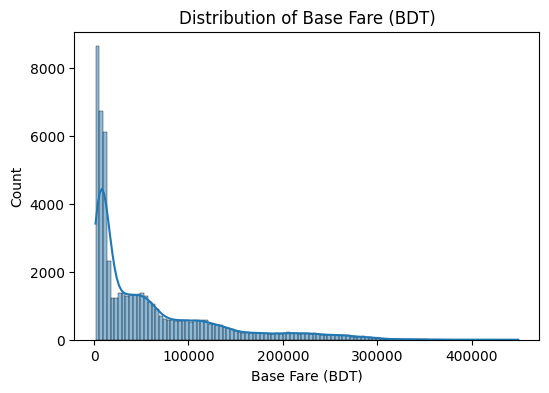

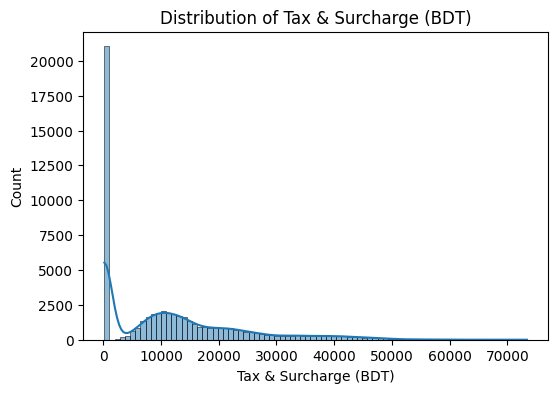

In [41]:
plot_fare_distributions(df)

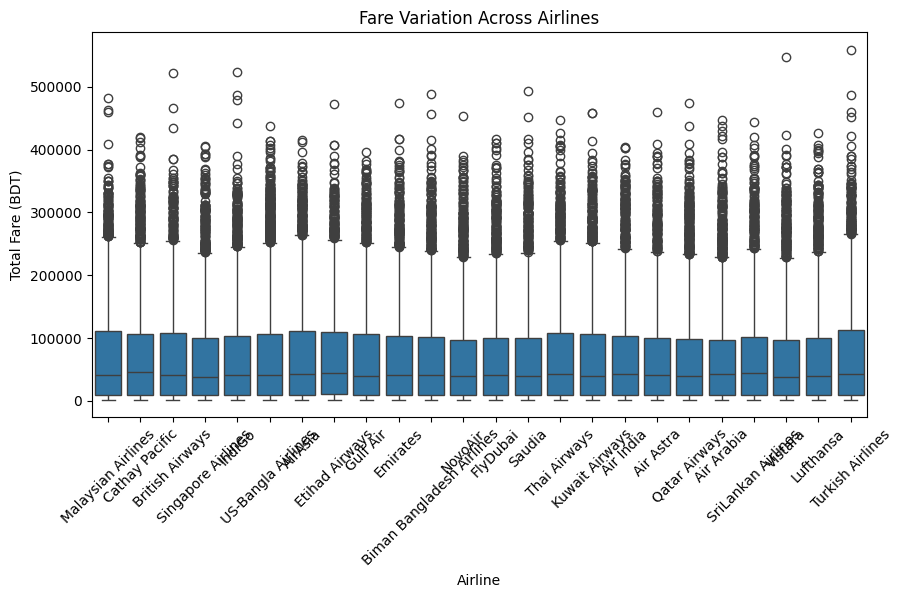

In [42]:
boxplot_fare_by_airline(df)

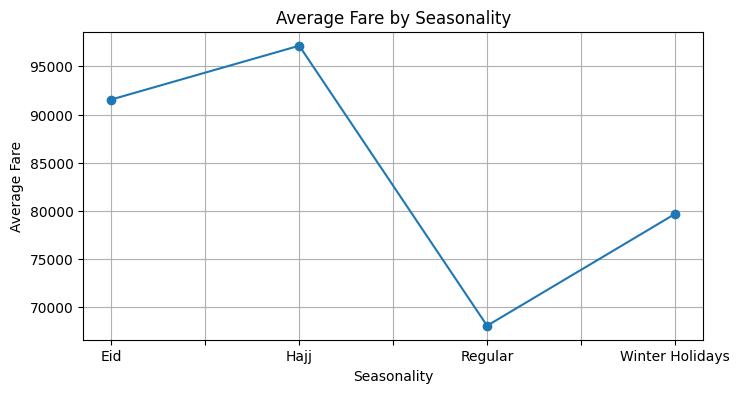

In [43]:
plot_avg_fare_over_time(df, time_col='Seasonality')

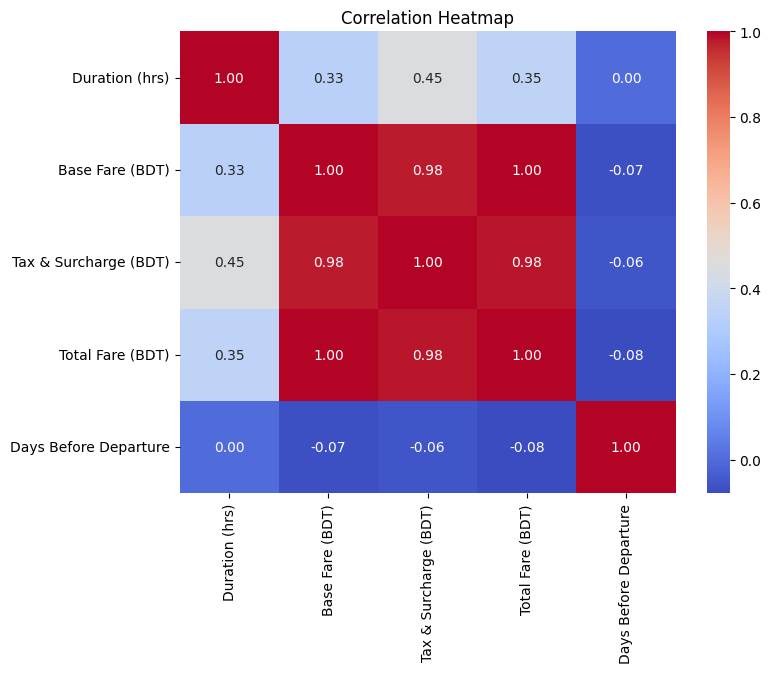

In [44]:
correlation_heatmap(df)

KPI Exploration

In [45]:
avg_fare_per_airline(df)

Airline
Turkish Airlines             75547.268550
AirAsia                      74534.390584
Cathay Pacific               73325.091166
Thai Airways                 72845.790039
Malaysian Airlines           72775.180358
IndiGo                       72504.433162
Air India                    72474.178421
US-Bangla Airlines           72088.288995
Kuwait Airways               71988.276256
Etihad Airways               71785.242100
Gulf Air                     71458.163788
SriLankan Airlines           71265.261054
British Airways              70555.536120
Biman Bangladesh Airlines    70192.969249
Emirates                     70106.149416
Air Arabia                   69924.006910
Qatar Airways                69865.536409
Lufthansa                    69293.163991
Saudia                       69270.676157
FlyDubai                     68987.689224
Air Astra                    68497.407734
NovoAir                      68350.859233
Singapore Airlines           68323.930904
Vistara                   

In [46]:
most_popular_route(df)

,Source,Destination,Flight Count
0,RJH,SIN,417


In [47]:
seasonal_fare_variation(df)

,mean,min,max
Seasonality,,,
Hajj,97144.471062,2682.58,558987.33
Eid,91560.023300,2291.60,524278.76
Winter Holidays,79676.737857,2120.46,493383.97
Regular,68077.271027,1800.98,420558.93


In [48]:
top_expensive_routes(df)

,Source,Destination,Total Fare (BDT)
0,SPD,BKK,117951.572526
1,CXB,YYZ,117848.709687
2,CXB,LHR,116667.654274
3,CXB,JFK,116476.311285
4,BZL,JFK,115968.436199


Descriptive Statistics

In [49]:
summarize_fares(df, group_cols=['Airline','Source', 'Destination','Seasonality'])

,Airline,Source,Destination,Seasonality,count,mean,median,min,max,std
0,Air Arabia,BZL,BKK,Regular,7,99682.932857,69072.12,16176.23,244647.34,77329.716734
1,Air Arabia,BZL,BKK,Winter Holidays,5,154133.268000,161176.78,70849.22,280098.52,80990.322383
2,Air Arabia,BZL,CCU,Regular,6,94363.785000,90449.18,10544.42,180042.70,75830.026656
3,Air Arabia,BZL,CCU,Winter Holidays,3,193087.010000,82599.78,79254.93,417406.32,194273.419784
4,Air Arabia,BZL,CGP,Regular,13,6445.838462,6746.47,2082.75,11669.05,2967.428830
...,...,...,...,...,...,...,...,...,...,...
8451,Vistara,ZYL,SPD,Regular,7,8038.657143,7501.66,2677.32,15190.03,4214.776786
8452,Vistara,ZYL,SPD,Winter Holidays,4,7001.122500,6243.49,4216.26,11301.25,3281.700889
8453,Vistara,ZYL,YYZ,Eid,1,185362.380000,185362.38,185362.38,185362.38,NaN
8454,Vistara,ZYL,YYZ,Regular,11,87779.075455,70898.45,33287.28,147664.25,42680.338873


In [50]:
numerical_correlation(df)

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
Duration (hrs),1.000000,0.333585,0.451704,0.350965,0.001136
Base Fare (BDT),0.333585,1.000000,0.977987,0.997842,-0.067484
Tax & Surcharge (BDT),0.451704,0.977987,1.000000,0.982172,-0.055237
Total Fare (BDT),0.350965,0.997842,0.982172,1.000000,-0.078789
Days Before Departure,0.001136,-0.067484,-0.055237,-0.078789,1.000000


TRAINING & TESTING MODEL

In [51]:
categorical_cols = ['Airline', 'Source', 'Destination', 'Aircraft Type', 'Class', 'Booking Source', 'Seasonality', 'Stopovers']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])
df.head()

,Airline,Source,Destination,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,Departure_date,Departure_time,Arrival_date,Arrival_time
0,14,2,2,1.22,2,0,1,1,21131.23,5169.68,26300.91,2,10,2025-11-17,06:25:00,2025-11-17,07:38:10
1,6,0,3,0.61,2,0,2,2,11605.40,200.00,11805.40,2,14,2025-03-16,00:17:00,2025-03-16,00:53:31
2,5,7,13,2.69,0,4,1,2,39882.50,11982.37,51864.87,3,83,2025-12-13,12:03:00,2025-12-13,14:44:22
3,18,5,5,0.69,2,0,1,0,4435.61,200.00,4635.61,2,56,2025-05-30,03:21:00,2025-05-30,04:02:09
4,5,6,18,14.06,0,1,0,0,59243.81,14886.57,74130.38,2,90,2025-04-25,09:14:00,2025-04-25,23:17:20


In [52]:
X = df[['Airline','Source', 'Destination', 'Aircraft Type', 'Class', 'Booking Source', 'Seasonality', 'Stopovers','Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Days Before Departure']]
y = df["Total Fare (BDT)"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
model = LinearRegression()

trained_model, mse = train_model(
    X_train,
    X_test,
    y_train,
    y_test,
    model
)

2026-02-13 15:38:52,709 - INFO - Training Linear Regression model
2026-02-13 15:38:52,723 - INFO - Model training completed
2026-02-13 15:38:52,725 - INFO - Predictions completed
2026-02-13 15:38:52,729 - INFO - R2 Score: 0.9969
2026-02-13 15:38:52,730 - INFO - MAE: 1694.8539
2026-02-13 15:38:52,731 - INFO - RMSE: 4551.6750


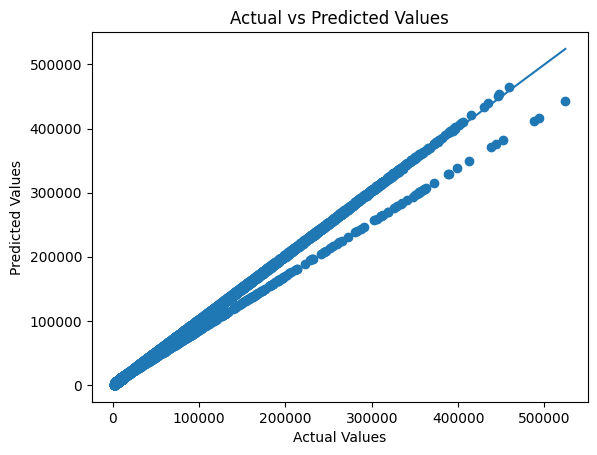

In [55]:
y_pred = trained_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred)


The actual vs. predicted plot indicates that the model captures the overall relationship between features and the target variable, particularly for lower and mid-range values. However, systematic deviations are observed for higher values, where the model consistently under-predicts the target.

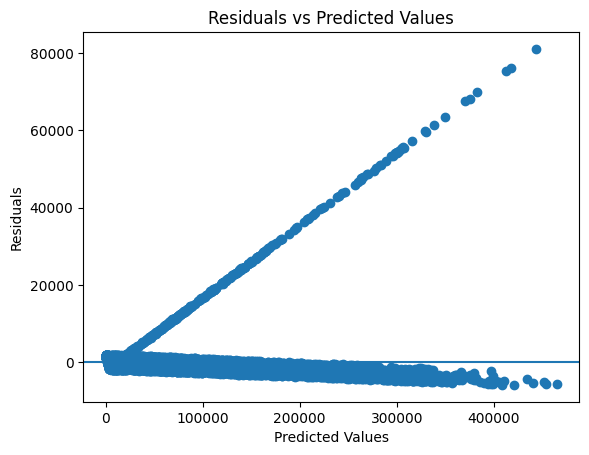

In [56]:
plot_residuals(y_test, y_pred)


Residual analysis reveals a clear non-random pattern and increasing error variance with higher predicted values, indicating heteroscedasticity and model bias. These patterns suggest that the linear model is insufficient to capture the underlying complexity of the data.

Overall, the model exhibits signs of underfitting at higher target values. Performance may be improved by applying target transformations, incorporating additional features, or using non-linear models such as ensemble tree-based methods.

In [57]:
results_df, models = train_and_compare_regressors(
    X_train,
    X_test,
    y_train,
    y_test
)

results_df

2026-02-13 15:38:53,084 - INFO - Training Ridge Regression with GridSearchCV
2026-02-13 15:39:12,751 - INFO - Ridge Regression | R2=0.9969, MAE=1694.8078, RMSE=4551.6597
2026-02-13 15:39:12,752 - INFO - Training Lasso Regression with GridSearchCV
2026-02-13 15:39:15,473 - INFO - Lasso Regression | R2=0.9969, MAE=1694.8301, RMSE=4551.7005
2026-02-13 15:39:15,474 - INFO - Training Decision Tree with GridSearchCV
2026-02-13 15:39:19,990 - INFO - Decision Tree | R2=0.9998, MAE=72.3057, RMSE=1255.3206
2026-02-13 15:39:19,990 - INFO - Training Random Forest with GridSearchCV
2026-02-13 15:44:36,055 - INFO - Random Forest | R2=0.9999, MAE=53.7180, RMSE=972.8919
2026-02-13 15:44:36,056 - INFO - Training Gradient Boosting with GridSearchCV
2026-02-13 15:45:47,204 - INFO - Gradient Boosting | R2=0.9999, MAE=367.3035, RMSE=647.9322


,Model,R2,MAE,RMSE,Best Params
0,Gradient Boosting,0.999937,367.303489,647.932242,"{'learning_rate': 0.05, 'n_estimators': 200}"
1,Random Forest,0.999858,53.717998,972.891944,"{'max_depth': 20, 'n_estimators': 200}"
2,Decision Tree,0.999764,72.305654,1255.320573,"{'max_depth': None, 'min_samples_split': 2}"
3,Ridge Regression,0.996892,1694.807786,4551.659657,{'alpha': 0.1}
4,Lasso Regression,0.996892,1694.830094,4551.700471,{'alpha': 0.1}


In [58]:
ridge_effect = demonstrate_regularization_effect(
    X_train, X_test, y_train, y_test, model_type="ridge"
)
ridge_effect


2026-02-13 15:45:47,233 - INFO - Ridge | alpha=0.0001 | Train RMSE=4670.85, Test RMSE=4551.68
2026-02-13 15:45:47,243 - INFO - Ridge | alpha=0.0005 | Train RMSE=4670.85, Test RMSE=4551.67
2026-02-13 15:45:47,253 - INFO - Ridge | alpha=0.0022 | Train RMSE=4670.85, Test RMSE=4551.67
2026-02-13 15:45:47,261 - INFO - Ridge | alpha=0.0100 | Train RMSE=4670.85, Test RMSE=4551.67
2026-02-13 15:45:47,270 - INFO - Ridge | alpha=0.0464 | Train RMSE=4670.85, Test RMSE=4551.67
2026-02-13 15:45:47,279 - INFO - Ridge | alpha=0.2154 | Train RMSE=4670.86, Test RMSE=4551.64
2026-02-13 15:45:47,288 - INFO - Ridge | alpha=1.0000 | Train RMSE=4670.86, Test RMSE=4551.53
2026-02-13 15:45:47,297 - INFO - Ridge | alpha=4.6416 | Train RMSE=4671.03, Test RMSE=4551.14
2026-02-13 15:45:47,306 - INFO - Ridge | alpha=21.5443 | Train RMSE=4674.28, Test RMSE=4552.09
2026-02-13 15:45:47,316 - INFO - Ridge | alpha=100.0000 | Train RMSE=4724.75, Test RMSE=4595.72


,Model,Alpha,Train RMSE,Test RMSE,Gap (Variance)
0,Ridge,0.000100,4670.854766,4551.675025,-119.179740
1,Ridge,0.000464,4670.854766,4551.674969,-119.179797
2,Ridge,0.002154,4670.854766,4551.674707,-119.180058
3,Ridge,0.010000,4670.854766,4551.673494,-119.181272
4,Ridge,0.046416,4670.854783,4551.667878,-119.186905
5,Ridge,0.215443,4670.855142,4551.642117,-119.213025
6,Ridge,1.000000,4670.862839,4551.529133,-119.333705
7,Ridge,4.641589,4671.025888,4551.143846,-119.882042
8,Ridge,21.544347,4674.278474,4552.089975,-122.188499
9,Ridge,100.000000,4724.748102,4595.719324,-129.028778


In [59]:
lasso_effect = demonstrate_regularization_effect(
    X_train, X_test, y_train, y_test, model_type="lasso"
)
lasso_effect

2026-02-13 15:45:49,318 - INFO - Lasso | alpha=0.0001 | Train RMSE=4670.85, Test RMSE=4551.68
2026-02-13 15:45:51,081 - INFO - Lasso | alpha=0.0005 | Train RMSE=4670.85, Test RMSE=4551.68
2026-02-13 15:45:52,493 - INFO - Lasso | alpha=0.0022 | Train RMSE=4670.85, Test RMSE=4551.68
2026-02-13 15:45:53,693 - INFO - Lasso | alpha=0.0100 | Train RMSE=4670.85, Test RMSE=4551.68
2026-02-13 15:45:54,721 - INFO - Lasso | alpha=0.0464 | Train RMSE=4670.85, Test RMSE=4551.69
2026-02-13 15:45:55,639 - INFO - Lasso | alpha=0.2154 | Train RMSE=4670.86, Test RMSE=4551.73
2026-02-13 15:45:56,250 - INFO - Lasso | alpha=1.0000 | Train RMSE=4670.88, Test RMSE=4551.95
2026-02-13 15:45:56,733 - INFO - Lasso | alpha=4.6416 | Train RMSE=4671.06, Test RMSE=4552.56
2026-02-13 15:45:57,161 - INFO - Lasso | alpha=21.5443 | Train RMSE=4671.27, Test RMSE=4551.87
2026-02-13 15:45:57,456 - INFO - Lasso | alpha=100.0000 | Train RMSE=4673.63, Test RMSE=4551.55


,Model,Alpha,Train RMSE,Test RMSE,Gap (Variance)
0,Lasso,0.000100,4670.854766,4551.675066,-119.179700
1,Lasso,0.000464,4670.854766,4551.675159,-119.179607
2,Lasso,0.002154,4670.854766,4551.675581,-119.179185
3,Lasso,0.010000,4670.854768,4551.677578,-119.177190
4,Lasso,0.046416,4670.854819,4551.686719,-119.168100
5,Lasso,0.215443,4670.855932,4551.730759,-119.125173
6,Lasso,1.000000,4670.879264,4551.949909,-118.929355
7,Lasso,4.641589,4671.063272,4552.555578,-118.507694
8,Lasso,21.544347,4671.267617,4551.867218,-119.400399
9,Lasso,100.000000,4673.625527,4551.546342,-122.079186


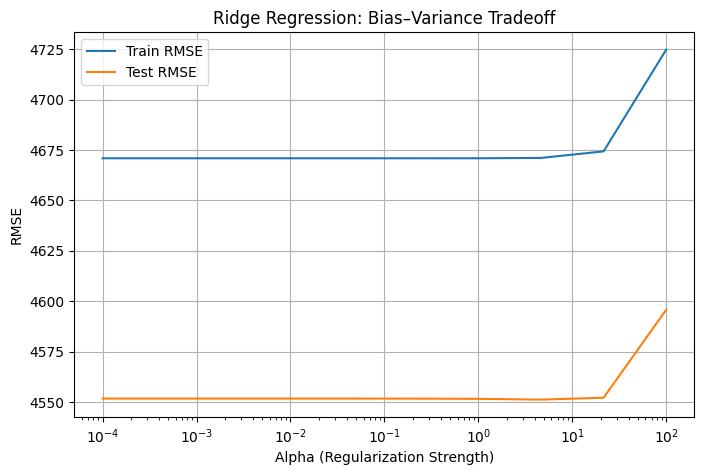

In [61]:
plot_regularization_effect(
    ridge_effect,
    model_name="Ridge Regression"
)


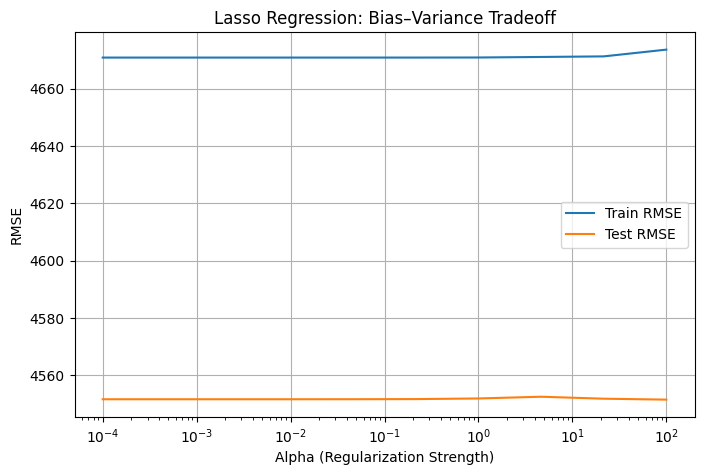

In [62]:
plot_regularization_effect(
    lasso_effect,
    model_name="Lasso Regression"
)

In [64]:
generate_text_insights(df)


--- INSIGHTS GENERATION ---

[Airline Pricing Strategy]
Average Fare by Airline (Descending):
Airline
21    75547.268550
3     74534.390584
6     73325.091166
20    72845.790039
14    72775.180358
11    72504.433162
2     72474.178421
22    72088.288995
12    71988.276256
8     71785.242100
10    71458.163788
19    71265.261054
5     70555.536120
4     70192.969249
7     70106.149416
0     69924.006910
16    69865.536409
13    69293.163991
17    69270.676157
9     68987.689224
1     68497.407734
15    68350.859233
18    68323.930904
23    68108.238754
Name: Total Fare (BDT), dtype: float64

Most Expensive Airline: 21
Cheapest Airline: 23

[Seasonality Trends]
Average Fare by Seasonality:
Seasonality
1    97144.471062
0    91560.023300
3    79676.737857
2    68077.271027
Name: Total Fare (BDT), dtype: float64

[Class Pricing]
Average Fare by Class:
Class
2    120764.213166
0     62581.014435
1     30002.073013
Name: Total Fare (BDT), dtype: float64

[Feature Correlations with Total Far

In [65]:
feature_importance_analysis()


[Model Feature Importance]
Model file not found at app_artifacts/flight_price_model.pkl. Skipping importance analysis.


In [66]:
feature_names = X.columns

In [67]:
ridge_coef = extract_linear_coefficients(
    models["Ridge Regression"],
    feature_names
)
ridge_coef


,Feature,Coefficient,Absolute Importance
8,Base Fare (BDT),69953.884100,69953.884100
9,Tax & Surcharge (BDT),11837.007986,11837.007986
10,Days Before Departure,-1077.328615,1077.328615
7,Stopovers,-63.533095,63.533095
1,Source,-33.323762,33.323762
4,Class,-32.449504,32.449504
5,Booking Source,-21.846084,21.846084
2,Destination,20.508346,20.508346
0,Airline,-17.857105,17.857105
3,Aircraft Type,14.610575,14.610575


In [68]:
lasso_coef = extract_linear_coefficients(
    models["Lasso Regression"],
    feature_names
)
lasso_coef

,Feature,Coefficient,Absolute Importance
8,Base Fare (BDT),69970.272744,69970.272744
9,Tax & Surcharge (BDT),11819.446499,11819.446499
10,Days Before Departure,-1077.093448,1077.093448
7,Stopovers,-64.763789,64.763789
1,Source,-33.215967,33.215967
4,Class,-32.931894,32.931894
5,Booking Source,-21.753642,21.753642
2,Destination,20.741983,20.741983
0,Airline,-17.770820,17.770820
3,Aircraft Type,16.591495,16.591495


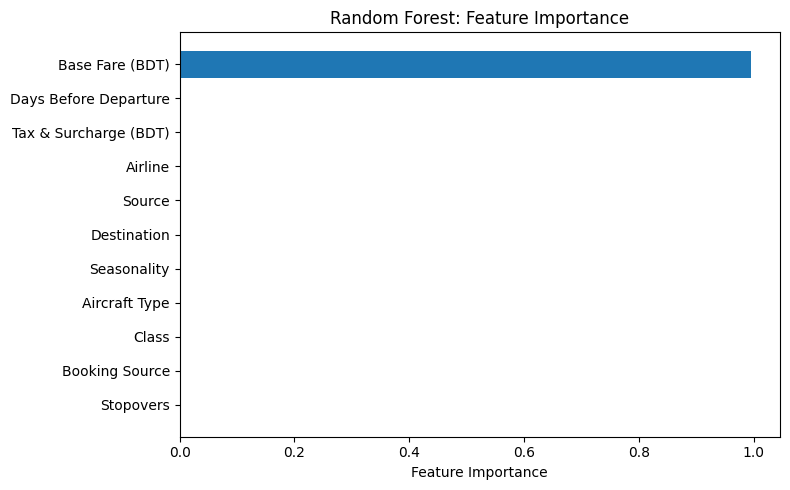

In [69]:
rf_importance = plot_tree_feature_importance(
    models["Random Forest"],
    feature_names,
    model_name="Random Forest"
)


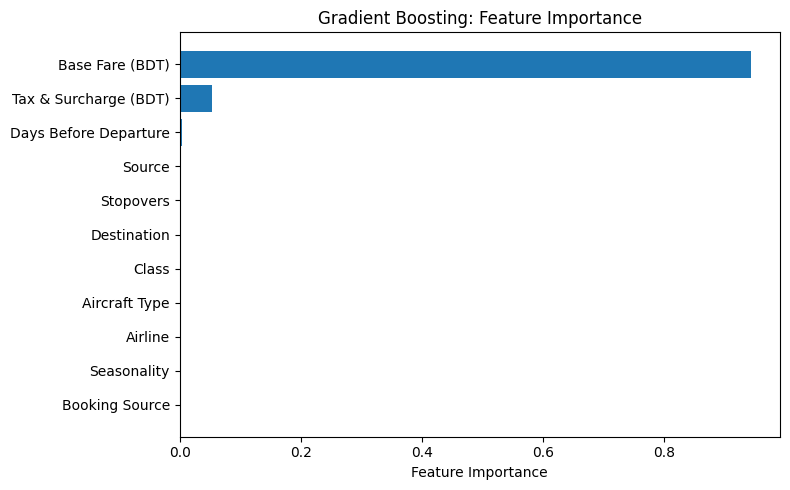

In [70]:
gb_importance = plot_tree_feature_importance(
    models["Gradient Boosting"],
    feature_names,
    model_name="Gradient Boosting"
)


## Non-Technical Summary: Flight Fare Analysis

# Key Findings

* **Booking Timing Matters Most**: Prices rise sharply the closer you book to departure.
* **Routes Affect Fares**: Popular and high-demand routes are consistently more expensive.
* **Airline Strategy Varies**: Premium carriers charge higher base fares; budget airlines compete more aggressively on price.
* **Seasonality Drives Prices**: Holidays and peak travel months significantly increase fares.
* **Stops and Duration Impact Cost**: Direct and longer flights are generally more expensive.

**Supporting Evidence**:

* Linear models (Ridge/Lasso) highlight which features have the strongest influence.
* Tree-based models (Random Forest / Gradient Boosting) capture complex interactions and accurately predict fares.

---

# Recommendations

# For Travelers

* **Book early** to avoid last-minute price spikes.
* **Avoid peak seasons** when possible.
* **Compare airlines and routes** for better deals.

# For Airlines

* **Dynamic pricing** should focus on booking window and seasonality.
* **Route-based pricing** maximizes revenue without alienating customers.
* **Promotions in off-peak seasons** encourage travel and smooth demand.

#### For Business / Policy Teams

* Use **Gradient Boosting for forecasting** future fares.
* Use **Ridge/Lasso** to identify key fare drivers and monitor pricing strategy.
* Regularly **analyze route and seasonal trends** for actionable insights.

---

> Flight prices are primarily driven by booking timing, route popularity, airline strategy, and seasonality 
 and using predictive modeling enables better pricing decisions and improved revenue management.

